In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [17]:
df = pd.read_parquet("../../data/final_ordinal.parquet")
df

,tiempo_en_espera,tiempo_desde_ultimo_despegue,tiempo_hasta_despegue,media_diff_1h,media_diff_45m,media_diff_30m,media_diff_20m,media_diff_10m,media_diff_5m,tiempo_holding_0,...,day_of_week_sin,day_of_week_cos,runway,holding_point_id,wake_vortex,tipo_avion_ultimo_despegue,holding_ocupado,pista_ocupada,en_camino_antes,wind_shear
0,-1.095089,0.467454,-0.345583,1.572900,2.434044,1.964619,1.616834,-0.181838,0.519453,0.038515,...,1.468347,-0.321507,3.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.918283,0.495566,-0.402049,1.572900,2.434044,1.964619,1.616834,-0.181838,0.519453,0.038515,...,1.468347,-0.321507,3.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.178717,-1.182950,-0.621141,-0.192815,0.048478,-0.277199,0.407609,-0.055478,1.548129,0.038515,...,1.468347,-0.321507,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.980547,-1.015578,-0.688423,-0.192815,0.048478,-0.277199,0.407609,-0.055478,1.548129,0.038515,...,1.468347,-0.321507,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.817512,-0.876808,-0.756566,-0.192815,0.048478,-0.277199,0.407609,-0.055478,1.548129,0.038515,...,1.468347,-0.321507,2.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54966,-0.184543,0.756241,-1.456905,-0.096931,-0.468572,-0.999474,-0.482059,0.990381,-0.013717,0.038515,...,1.183592,0.830257,2.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0
54967,-0.094995,-2.732264,-1.570895,-0.094788,-0.435125,-0.889278,-0.360298,0.962324,2.031921,0.038515,...,1.183592,0.830257,2.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0
54968,-2.620854,1.689082,-1.581217,-0.356014,-0.126825,0.314374,0.777127,-0.157903,-0.089067,0.038515,...,1.183592,0.830257,2.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
54969,-1.380776,1.403705,-0.403033,1.067466,0.979845,1.627548,0.112983,0.616715,-0.089067,0.038515,...,1.183592,0.830257,3.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0


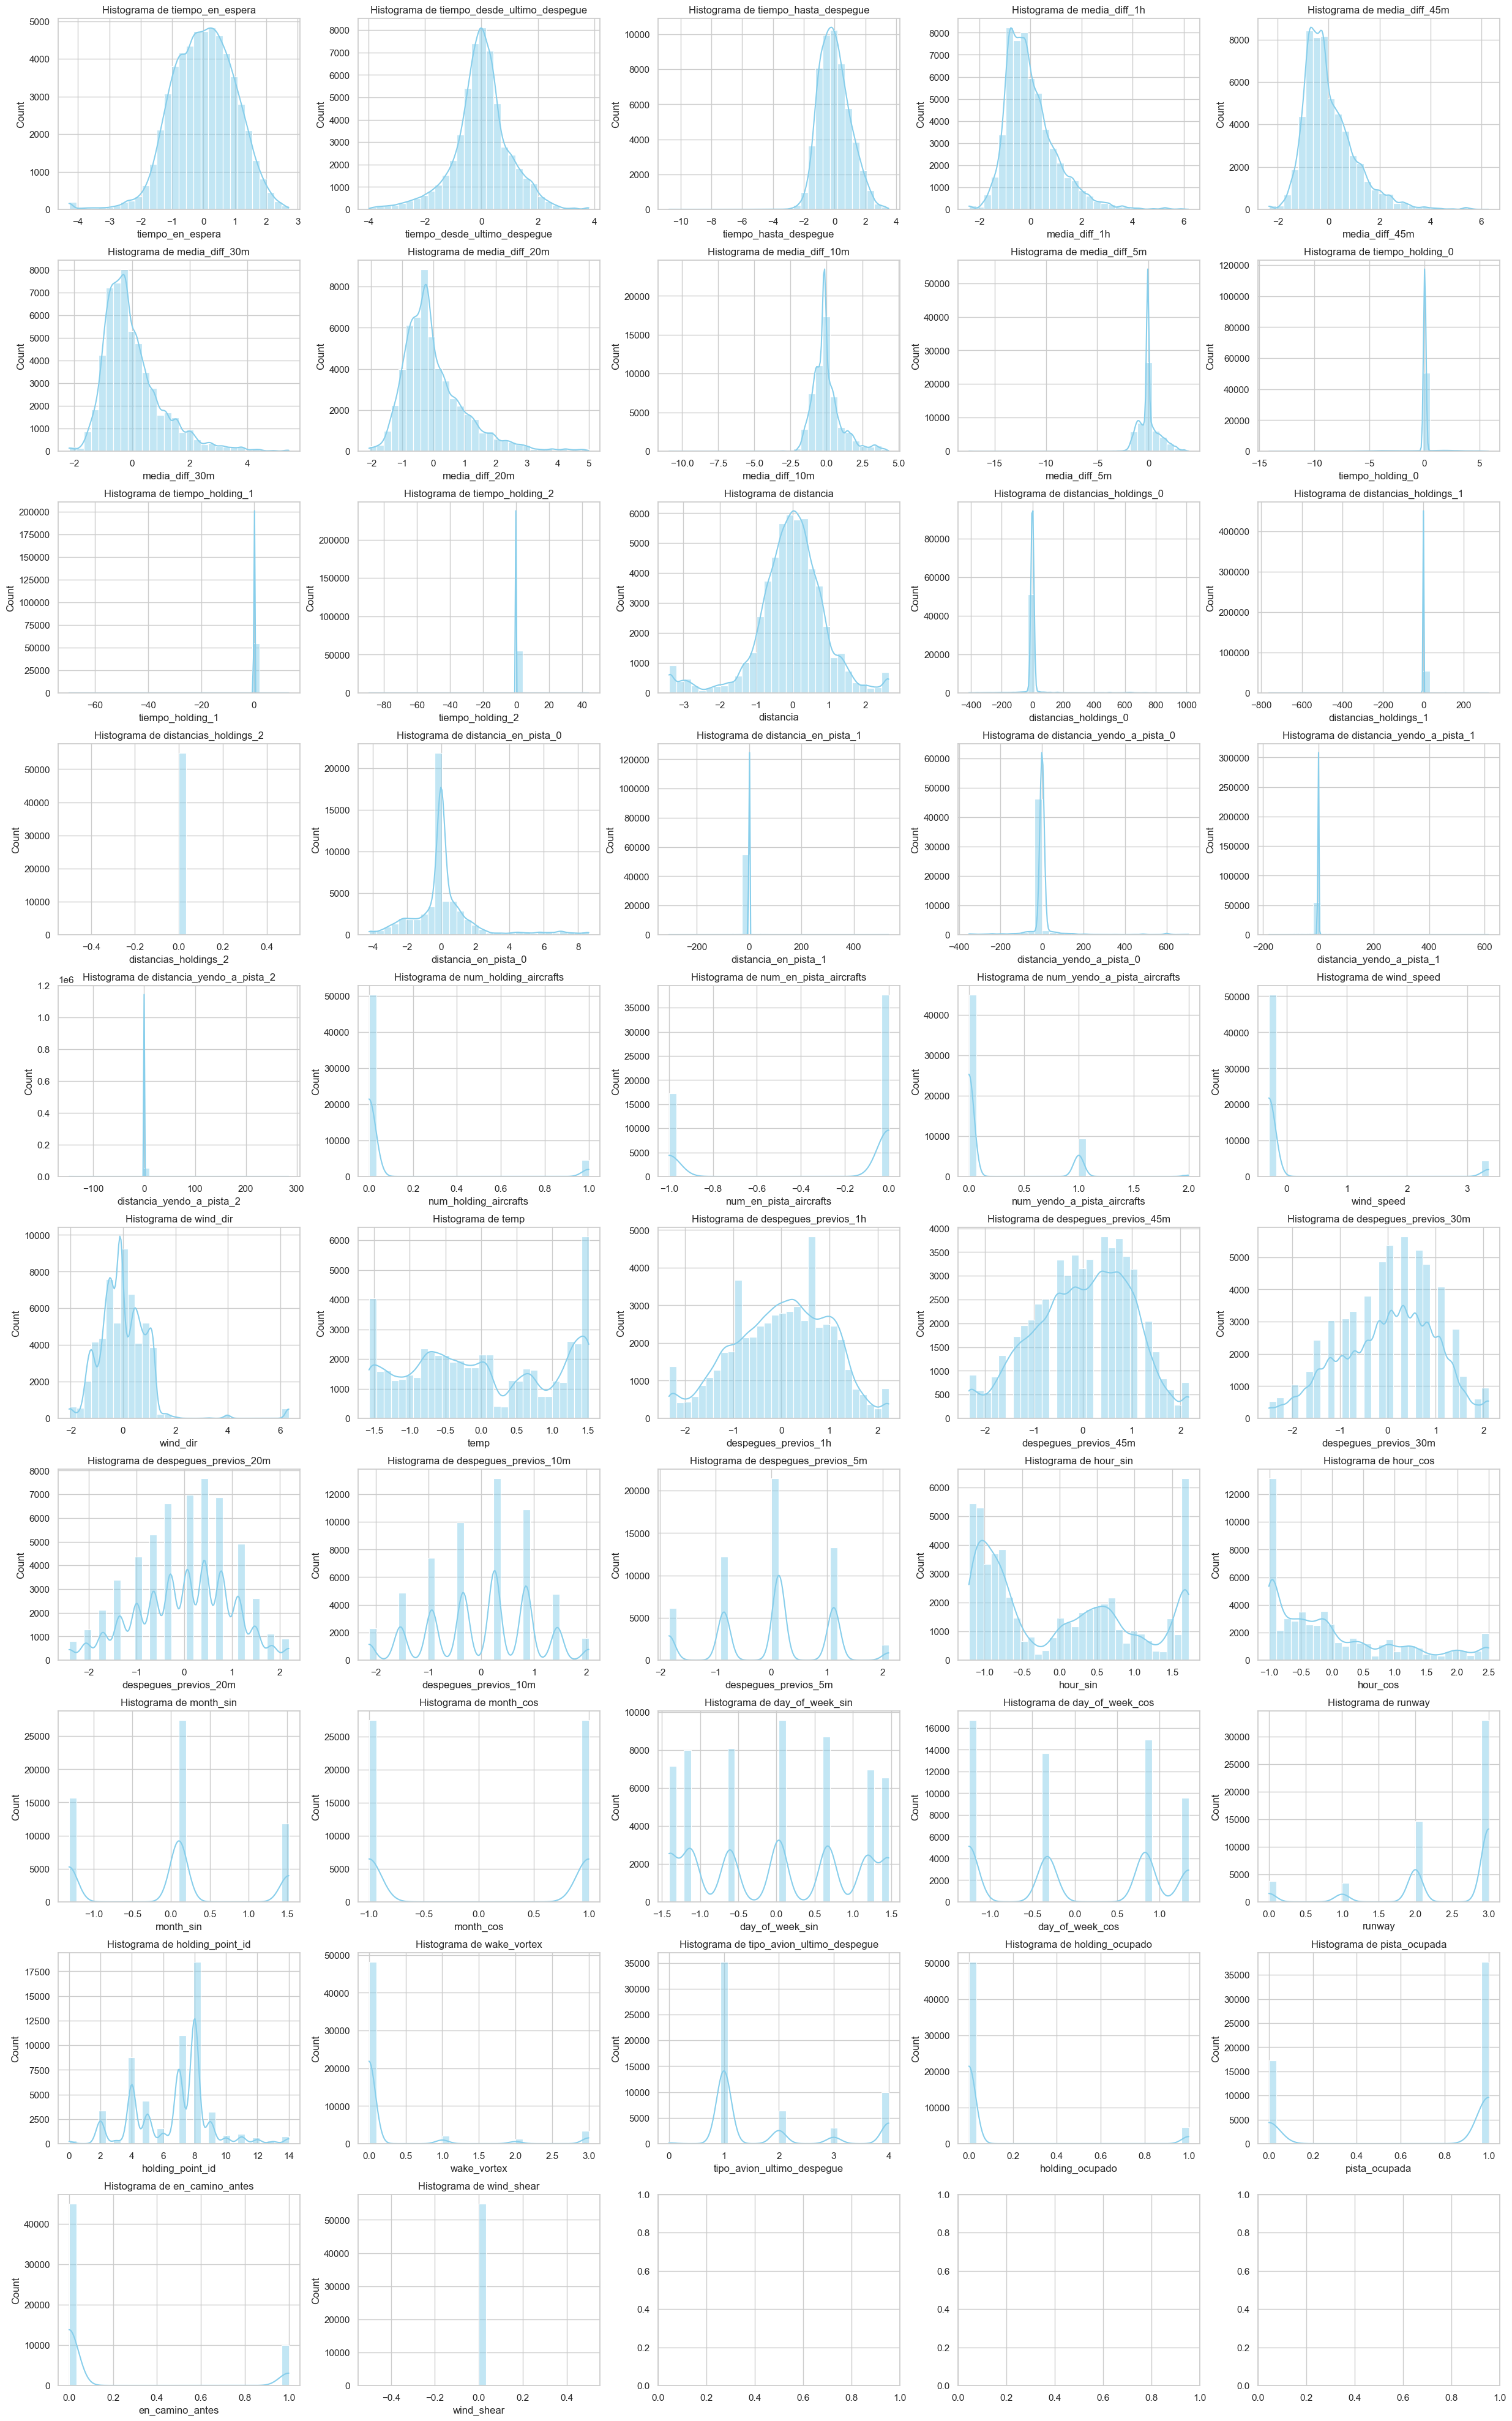

In [18]:
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
n_cols = 5
n_rows = int(np.ceil(len(df.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 4))
fig.tight_layout(pad=3.0)
for i, col in enumerate(df.columns):
    row = i // n_cols
    col_pos = i % n_cols
    if n_rows == 1:
        ax = axes[col_pos]
    else:
        ax = axes[row, col_pos]
    if col in numeric_cols:
        try:
            sns.histplot(df[col], kde=True, ax=ax, color='skyblue', bins=30)
            ax.set_title(f'Histograma de {col}')
        except:
            print(col)
    elif col in categorical_cols:
        try:
            sns.countplot(data=df, x=col, ax=ax, palette='viridis')
            ax.set_title(f'Conteo de {col}')
            ax.tick_params(axis='x', rotation=45)
        except: 
            print(col)
    else:
        ax.axis('off')
plt.show()

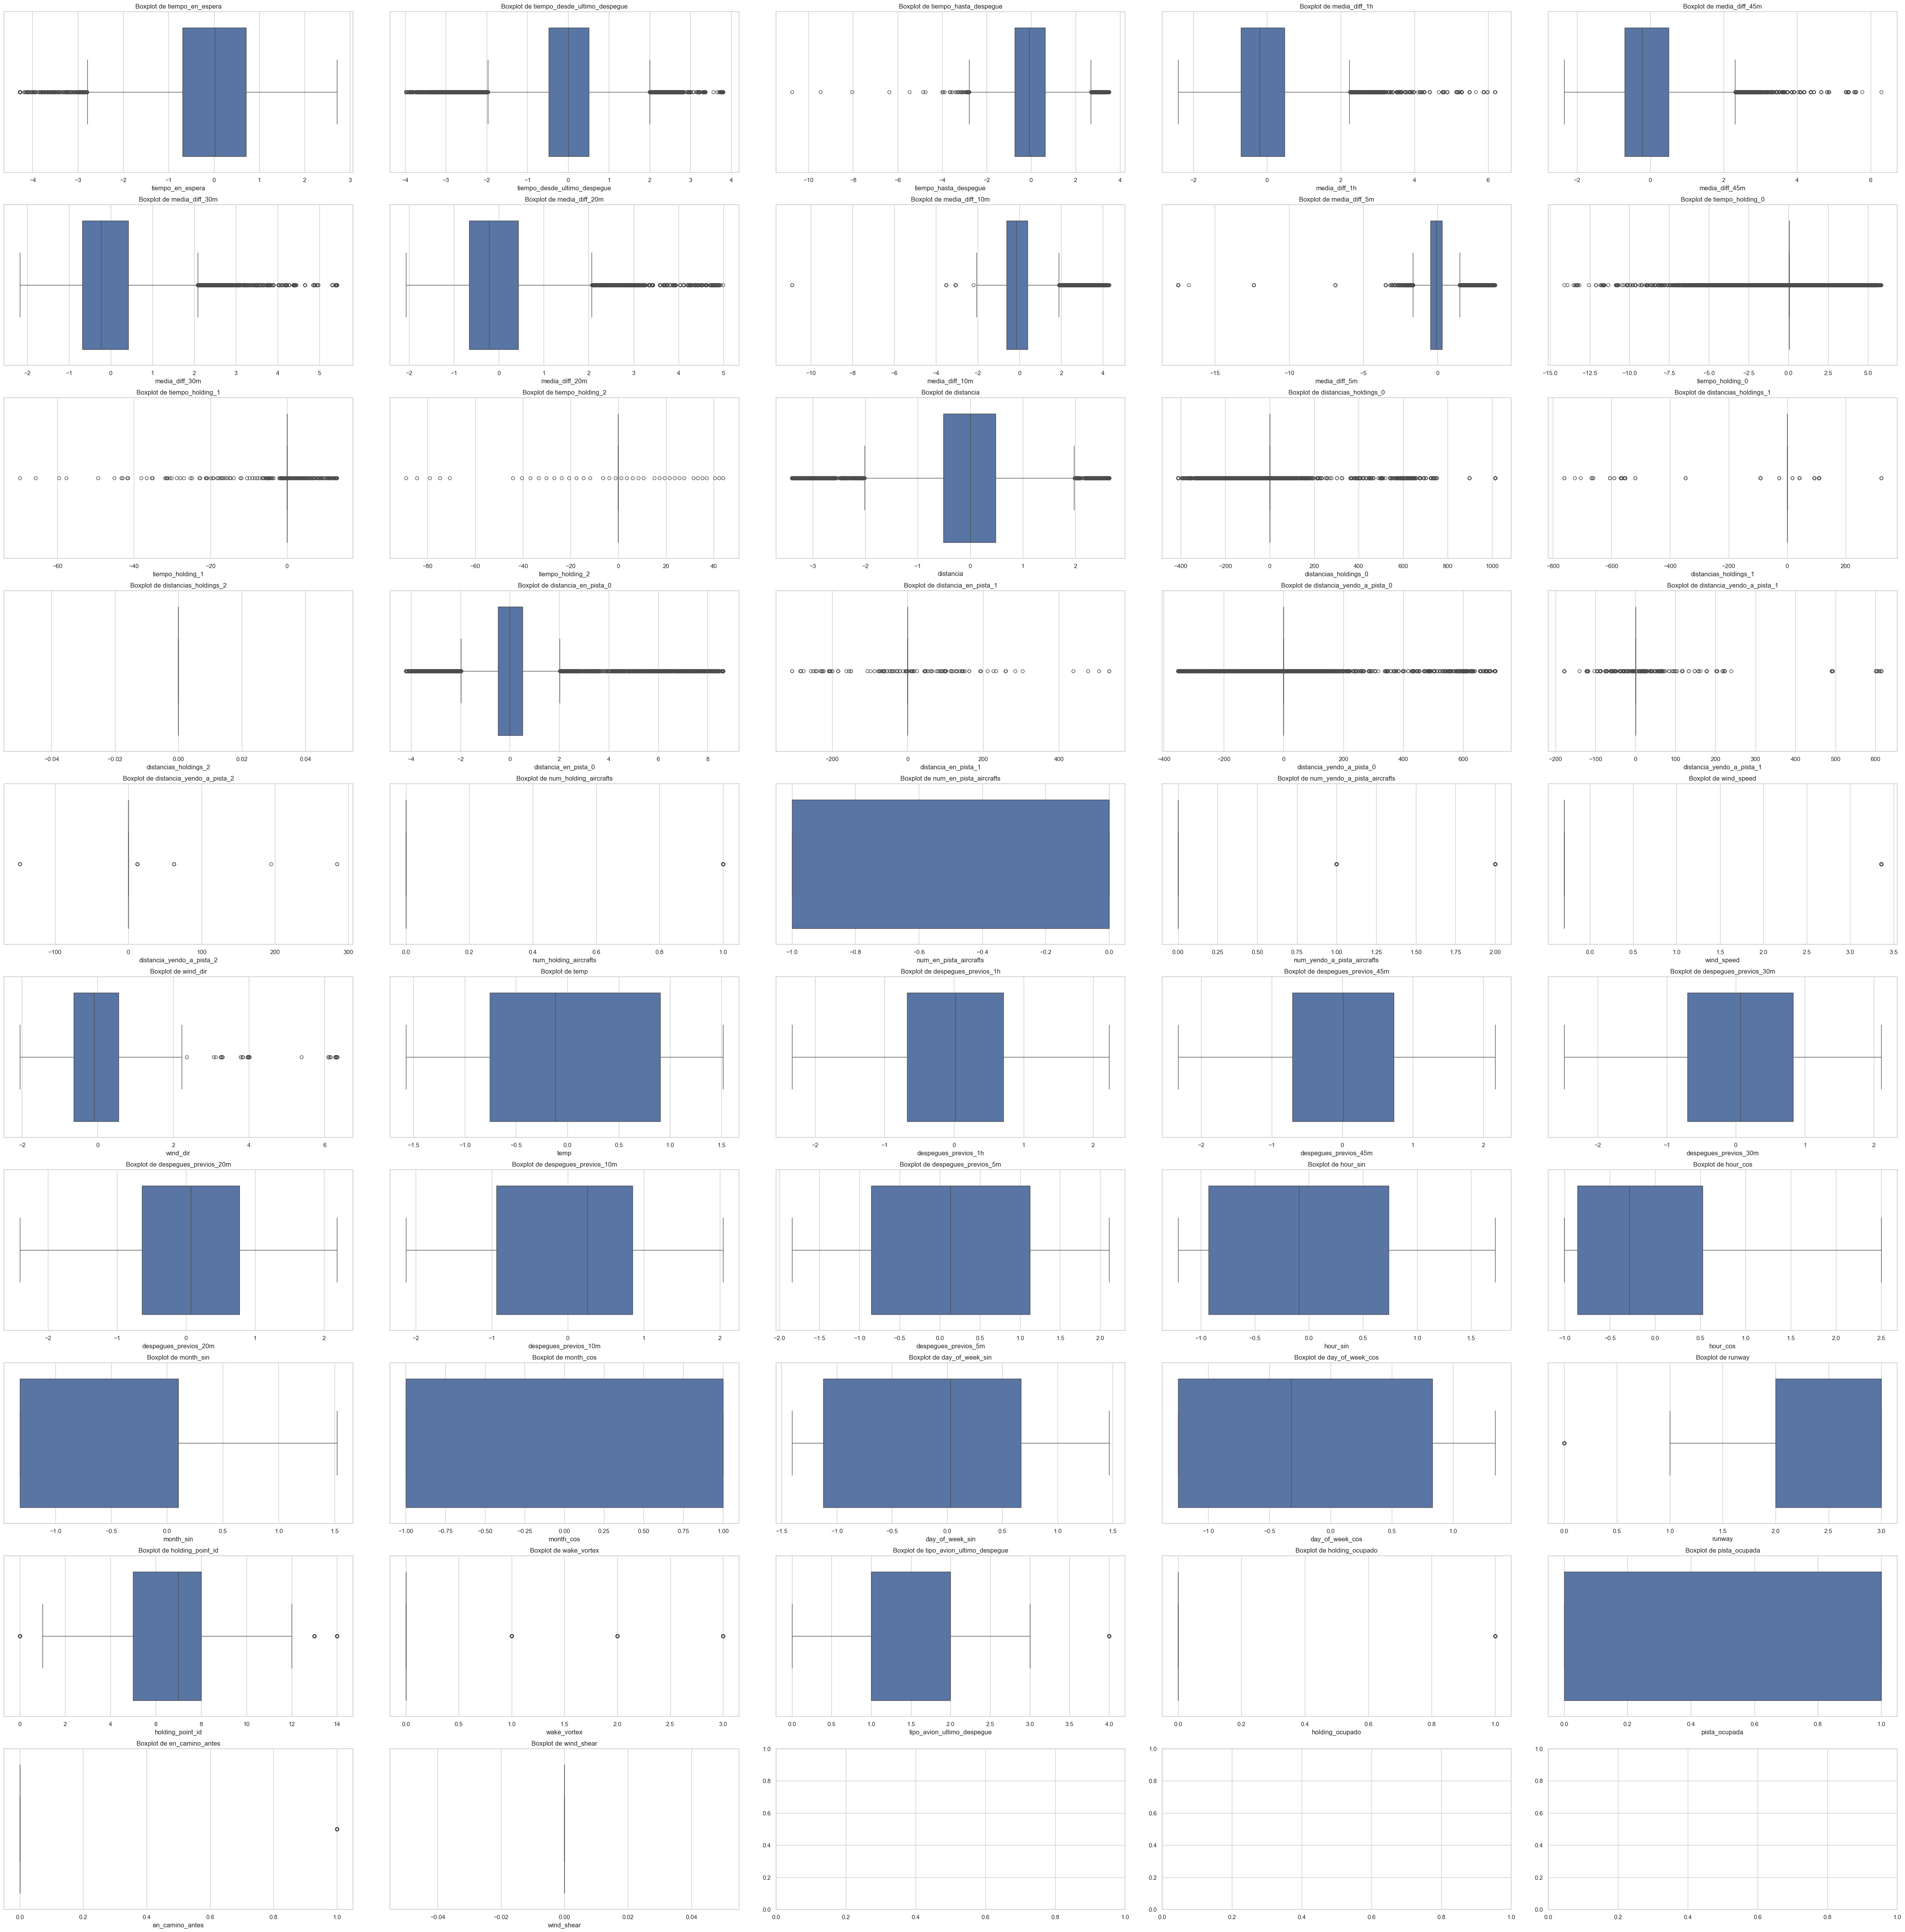

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df.reset_index(drop=True)
categorical_cols = df_plot.select_dtypes(exclude=[np.number]).columns
n_rows = int(np.ceil(len(df_plot.columns) / n_cols))
sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, n_rows * 5))
fig.tight_layout(pad=3.0)
for i, col in enumerate(df_plot.columns):
    df_tmp = df_plot.copy()
    row = i // n_cols
    col_pos = i % n_cols
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]
    if col in numeric_cols:
        sns.boxplot(x=df_tmp[col], ax=ax)
        ax.set_title(f'Boxplot de {col}')
    elif col in categorical_cols:
        try:
            sns.countplot(x=df_tmp[col], ax=ax)
            ax.set_title(f'Conteo de {col}')
            ax.tick_params(axis='x', rotation=45)
        except Exception as e:
            print(f"Error plotting {col}: {e}")
    else:
        ax.axis('off')
plt.show()